In [1]:
import pandas as pd
import sys
sys.path.append("../../lib") # Adds higher directory to python modules path.
import helper_functions as hf
import analysis
PATH = "../../data/"

In [2]:
optimisation_result = hf.load_pickle(f'{PATH}pickle/Bag_of_Words_Random_Forest/BOW_optimisation_result')

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
optimisation_result.keys()

dict_keys(['best_score_', 'best_NLP_gp', 'best_params_', 'best_estimator_', 'X_train', 'X_test', 'pipe', 'NLP_param_grid', 'grid_search_param_grid', 'df_train', 'df_test', 'y_train', 'y_test'])

In [4]:
clf_best = optimisation_result['best_estimator_']
X_train = optimisation_result['X_train']
X_test = optimisation_result['X_test']
y_train = optimisation_result['y_train']
y_test = optimisation_result['y_test']

y_pred = clf_best.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score

pred_train = clf_best.predict(X_train)
pred_test = clf_best.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
print('Train accuracy: ', round(acc_train, 3))

acc_test = accuracy_score(y_test, pred_test)
print('Test accuracy: ', round(acc_test, 3))

Train accuracy:  0.999
Test accuracy:  0.455


Confusion matrix, without normalization
[[27  4  0  2  5]
 [ 3 17  9  9  6]
 [ 1 11 22 13  4]
 [ 1  9  8 21  1]
 [ 2 15  7  6 10]]


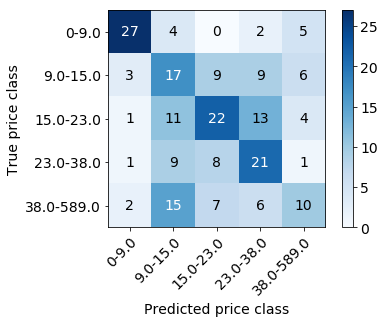

In [6]:
class_names = ['0-9.0', '9.0-15.0', '15.0-23.0', '23.0-38.0', '38.0-589.0']

# Plot non-normalized confusion matrix
ax = analysis.plot_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=class_names)
fig = ax.figure
fig.savefig('confusion_matrix_BOW.png', dpi=200, bbox_inches='tight')

In [7]:
optimisation_result['best_params_']

{'max_depth': 100,
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'random_state': 42}